This is the 3rd iteration of the code where we use less number of parameters compared to previous examples and also try to achive more test accuracy. Here we see that Batchnormalization is used and this is because the after some training  using the activation function, only positive vaules of the textures, gradients are passed through the layers but to gain more accuracy we also need the minor details in kernels. This can be done using BatchNormalization where it equalizes the whole kernel and higlights the minute edges and textures which help in getting more accuracy. Batchnormalization can be used either before Maxpooling or after it.

(60000, 28, 28)


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

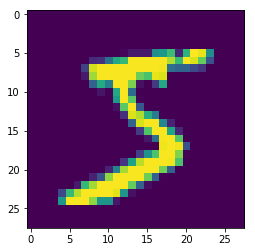

In [21]:
# https://keras.io/
!pip install -q keras
import keras
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
y_train[:10]
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
Y_train[:10]


In [30]:
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Convolution2D(16, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(32, 3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(16, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(32, 3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32, 3))
model.add(BatchNormalization())
model.add(Convolution2D(10, 1))

model.add(Flatten())
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
             optimizer='Adam',
             metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_74 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
batch_normalization_20 (Batc (None, 26, 26, 8)         32        
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 24, 24, 16)        1168      
_________________________________________________________________
batch_normalization_21 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 22, 22, 32)        4640      
_________________________________________________________________
batch_normalization_22 (Batc (None, 22, 22, 32)        128       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 11, 11, 32)        0         
__________

In [33]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=15, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
  544/60000 [..............................] - ETA: 19s - loss: 0.0170 - acc: 0.9945

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 18s 305us/step - loss: 0.0124 - acc: 0.9959 - val_loss: 0.0325 - val_acc: 0.9918
Epoch 2/15
60000/60000 [==============================] - 18s 308us/step - loss: 0.0137 - acc: 0.9953 - val_loss: 0.0267 - val_acc: 0.9932
Epoch 3/15
60000/60000 [==============================] - 20s 326us/step - loss: 0.0107 - acc: 0.9965 - val_loss: 0.0307 - val_acc: 0.9904
Epoch 4/15
60000/60000 [==============================] - 19s 311us/step - loss: 0.0114 - acc: 0.9963 - val_loss: 0.0313 - val_acc: 0.9911
Epoch 5/15
60000/60000 [==============================] - 19s 311us/step - loss: 0.0099 - acc: 0.9967 - val_loss: 0.0276 - val_acc: 0.9926
Epoch 6/15
60000/60000 [==============================] - 19s 310us/step - loss: 0.0101 - acc: 0.9965 - val_loss: 0.0267 - val_acc: 0.9922
Epoch 7/15
60000/60000 [==============================] - 20s 327us/step - loss: 0.0090 - acc: 0.9966 - val_loss: 0.0401 - val_acc: 0.9901
Epoch 8/15
60000/60000 [==============

In [34]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.02886478079548424, 0.9934]


In [36]:
y_pred = model.predict(X_test)
print(y_pred[:9])
print(y_test[:9])

[[8.56398286e-12 6.79081396e-08 3.60653942e-08 7.24941884e-10
  7.19854454e-11 4.38039926e-12 7.77130964e-13 9.99999881e-01
  7.06904641e-13 4.39961817e-11]
 [5.83043724e-10 5.84323452e-08 9.99985933e-01 4.01057632e-10
  7.58765140e-09 1.75651022e-15 1.40965267e-05 8.11632650e-10
  1.39210050e-11 4.21487498e-13]
 [1.83615848e-11 1.00000000e+00 7.18962260e-12 3.41092172e-14
  1.52003192e-08 1.08997433e-09 2.08132803e-10 2.36987674e-09
  1.02202101e-11 1.67220491e-11]
 [9.99998212e-01 1.73062205e-08 1.06613363e-09 8.39307024e-09
  7.23524138e-08 6.02434991e-10 1.17211862e-07 1.06016685e-07
  6.48085186e-09 1.48897993e-06]
 [3.71745560e-12 1.54772248e-08 3.56886916e-12 9.45216648e-12
  1.00000000e+00 1.13590543e-11 9.32807831e-10 2.77777389e-12
  1.91035490e-08 3.28366063e-08]
 [5.07660580e-12 1.00000000e+00 1.45696530e-12 2.28795458e-14
  1.72636139e-09 1.28565275e-11 3.69109639e-11 1.48797605e-08
  1.07561713e-12 3.38669648e-10]
 [1.04498930e-10 8.26197993e-06 2.19633844e-09 4.85961857e